In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('tns_search_classified_21072021.csv')

In [ ]:
data.shape

In [ ]:
# construct big classification
big_class = {}
big_class['multiple_object'] = ['EB*', 'EllipVar', 'Symbiotic*','SB*','DQHer', 
                                'Nova-like','EB*betLyr','AMHer','Nova','EB*Algol',
                                'EB*WUMa','CataclyV*',
                                  'DwarfNova','EB*']
big_class['star'] = ['brownD*','SG*','RCrB_Candidate', 'HV*', 'WR*', 'YellowSG*','gammaDor','RotV*alf2CVn',
                     'Erupt*RCrB','BlueStraggler','Eruptive*','V*?', 'Pulsar', 
                     'PulsV*bCep','low-mass*','post-AGB*', 'Pec*','pMS*','HotSubdwarf',
                     'PM*','*inNeb','pulsV*SX','RGB*','HB*','BYDra',
                       'PulsV*RVTau', 'BlueSG*','Irregular_V*','WD*','Ae*','RedSG*',
                     'AGB*','OH/IR','Be*','Cepheid','PulsV*delSct','RotV*','PulsV*',
                       'PulsV*WVir','S*','RSCVn','deltaCep','TTau*','Em*','Orion_V*',
                     'YSO','V*','C*','Mira','LPV*','Star','RRLyr']
big_class['galaxy'] = ['LINER','Blazar','AGN','BLLac','QSO','Galaxy']
big_class['SN'] = ['SNIb-pec', 'SNIb/c','SNII-pec','SN', 'SNIbn','SNIc-BL','SNI',
                   'SNIb','SNIIb','SLSN-II','SNIIP','SLSN-I','SNIc','SNIIn','SNII',
                  'SN Ibn','SN Ic-BL','SN I', 'SN Ib','SN IIb','SN IIP', 'SN Ic','SN IIn',
                   'SN II', 'SN Icn', 'SN Ib/c','SN Ib-pec','SN IIL', 'SN II-pec']
big_class['other_TNS'] = ['Mdwarf', 'LBV','TDE','Other','CV','Varstar', 'M dwarf','LRN',
                          'FRB']
big_class['Ia'] = ['Ia', 'SN Ia', 'SN Ia-91T-like', 'SN Ia-91bg-like', 'SN Ia-CSM', 
                'SN Ia-pec', 'SN Iax[02cx-like]']


In [16]:
data_class = []

for i in range(data.shape[0]):
    objtype = data.iloc[i]['Obj. Type']
    
    for key in big_class.keys():
        if objtype in big_class[key]:
            data_class.append(key)
            
data_class = np.array(data_class)

In [17]:
data_class.shape

(395,)

In [19]:
np.unique(data_class, return_counts=True)

(array(['Ia', 'SN'], dtype='<U2'), array([340,  55]))

In [20]:
340.0/395

0.8607594936708861

In [39]:
all_TNS = np.array([['SN Ia', 1149], 
['SN II',  242], 
['SN Ia-91T-like', 48], 
['SN IIn', 44],
['FRB', 41],
['CV', 37], 
['SN Ic',29  ],
['SN Ib',29 ],
['SN IIb', 26 ],
['SLSN-I',19 ],
['SN IIP',19 ],
['SN Ia-91bg-like',18 ],
['Other',  13 ],
['SN Ic-BL', 12 ],
['Nova', 12 ],
['SN Ia-pec', 12],
['TDE', 12  ],
['SN I',  11 ],
['SN Ib/c',11 ],
['SN',9  ],
['SN Ibn', 8 ],
['AGN', 7 ],
['Varstar',  6 ],
['Galaxy',5 ],
['SN Iax[02cx-like]',4 ],
['SLSN-II', 4 ],
['SN Ia-CSM',3 ],
['SN Ib-pec', 3 ],
['SN II-pec',2],
['LBV', 2 ],
['SN Icn',  2],
['SN IIn-pec',  1],
['LRN',1],
['Impostor-SN',1]])

In [47]:
tns_class = []

for i in range(all_TNS.shape[0]):    
    for key in big_class.keys():
        if all_TNS[i][0] in big_class[key]:
            for j in range(int(all_TNS[i][1])):
                tns_class.append(key)
            
tns_class = np.array(tns_class)

In [172]:
types, number = np.unique(tns_class, return_counts=True)

tns_pop = pd.DataFrame()
tns_pop['type'] = types
tns_pop['number'] = number.astype(float)/len(tns_class)
tns_pop['sample'] = 'all TNS'

c1 = pd.DataFrame()
c1['type'] = np.unique(data_class, return_counts=True)[0]
c1['number'] = np.unique(data_class, return_counts=True)[1]/len(data_class)
c1['sample'] = 'Fink Ia candidates'

tns_pop2 = pd.concat([tns_pop,c1], ignore_index=True)

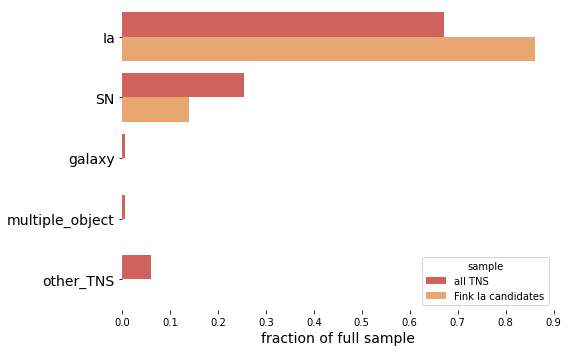

In [181]:
f, ax = plt.subplots(figsize=(8, 5))

sns.set_palette('Spectral')
sns.barplot(x="number", y="type", data=tns_pop2,
            hue='sample')
ax.set(xlim=(0, 0.9), ylabel="")
ax.set_xlabel(xlabel="fraction of full sample", fontsize=14)
ax.set_yticklabels(types, fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
#plt.savefig('perc_TNS_confirmed.png')